# CO2 Emission Data Cleaning

**Objective:** Export an excel file that contains CO2 Emissions, GDP Information, Energy Consumption and Trade GDP Ratio in its respective sheets, with country names as its unique identifier

## Preparing the Data
- Import required dependencies
- Load all datasets for consideration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datasets
path = "./Datasets/"

#main
main_df = pd.read_excel(path + 'CO2 emission by countries.xlsx');

#gdp
gdp_df1 = pd.read_csv(path + 'Countries GDP 1960-2020.csv')
gdp_df2 = pd.read_csv(path + 'GDP.csv')
gdp_df3 = pd.read_csv(path + 'World GDP Dataset.csv') #chosen
gdp_df4 = pd.read_csv(path + 'world_country_gdp_usd.csv')

#energy_consumption
ec_df1 = pd.read_csv(path + 'Electricity_Production_By_Source.csv')
ec_df2 = pd.read_csv(path + 'Energy data 1990 - 2020.csv')
ec_df3 = pd.read_csv(path + 'per-capita-energy-use.csv')
ec_df4 = pd.read_csv(path + 'World_Per_Capita_Electricity_Consumption.csv') #chosen

#trade_gdp ratio
# trade_df1 = pd.read_csv(path + 'List_of_countries_by_trade-to-GDP_ratio.csv')
# trade_df2 = pd.read_csv(path + 'export kgs in worldsclean - export clean.csv')

#population
pop_df = pd.read_csv(path + 'WPP2022_Population1JanuaryBySingleAgeSex_Medium_1950-2021.csv')

#trade gdp
trade_df = pd.read_excel(path + 'merged_df4.xlsx')

print('Datasets Loaded!')

<ipython-input-2-f8d29e29a10e>:24: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  pop_df = pd.read_csv(path + 'WPP2022_Population1JanuaryBySingleAgeSex_Medium_1950-2021.csv')


Datasets Loaded!


## Filtering main CO2 Dataset
The ‘CO2 Emission by countries Year wise (1750-2022)’ dataset will be used as the main/primary dataset for analysis. 

In [3]:
# Main Dataset

In [4]:
main_df.shape

(59620, 9)

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  int64  
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  float64
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 4.1+ MB


In [6]:
#Number of Countries in Main
main_countries = main_df['Country'].unique().tolist()
print(main_countries)
print()
print('# of Countries: ', len(main_countries))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Gr

**Findings:** There is a total of 220 countries in the dataset, with the list of countries named above.

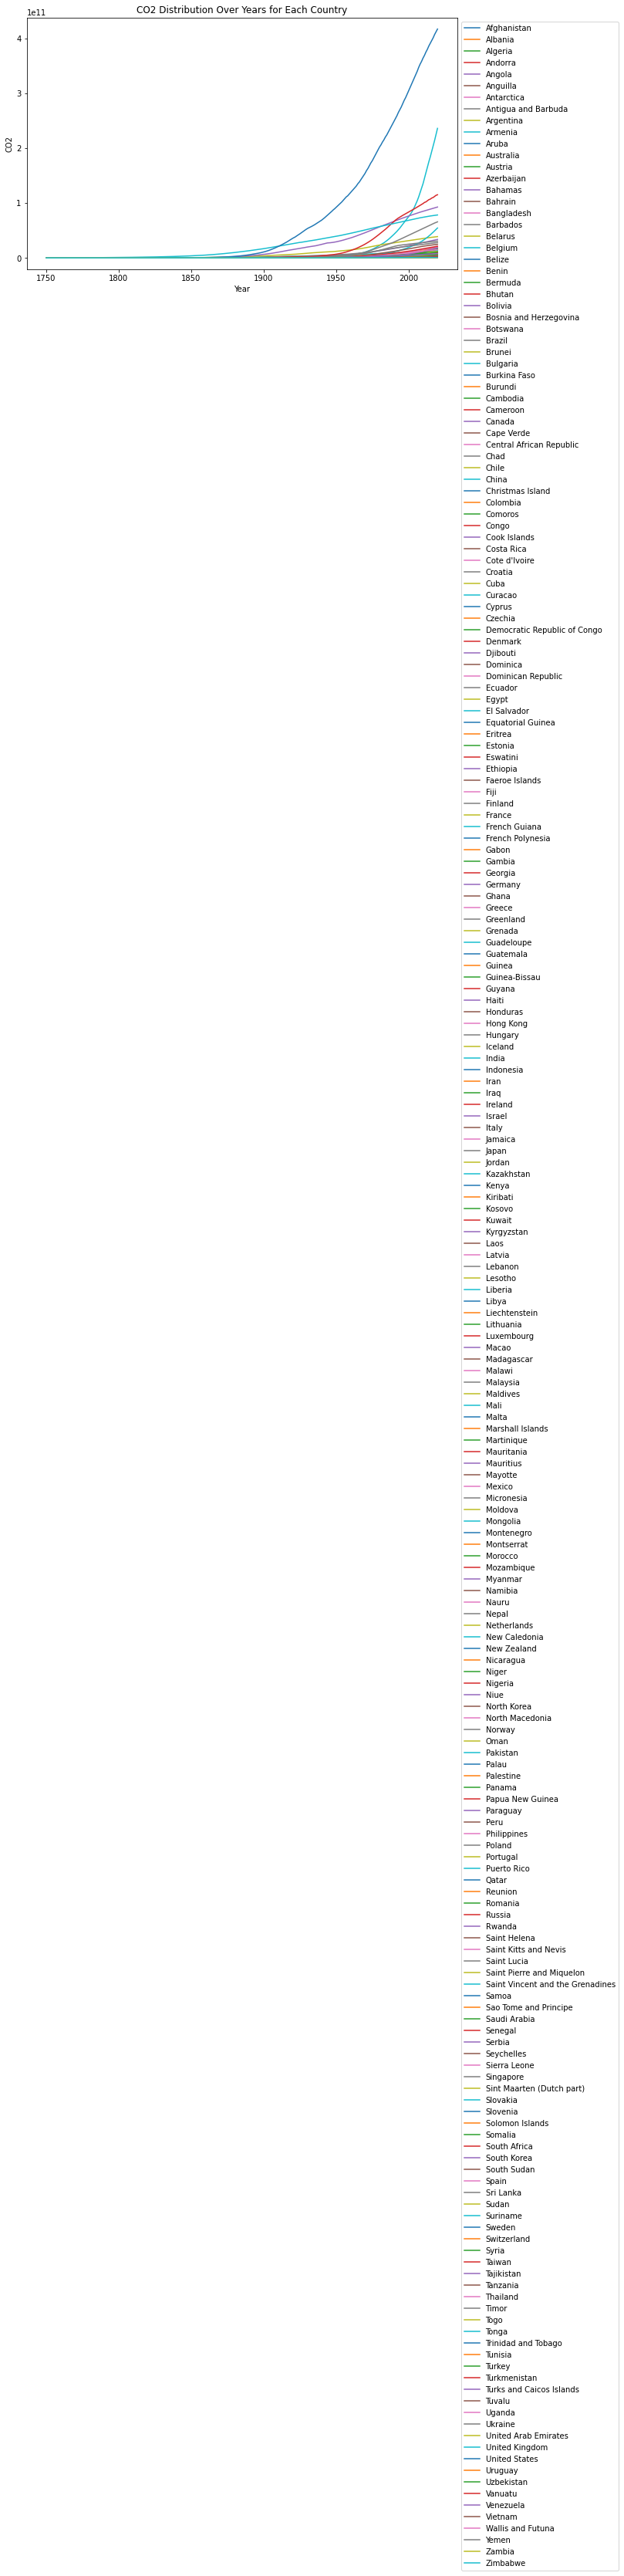

In [7]:
non_zero_years = main_df[main_df.groupby('Year')['CO2 emission (Tons)'].transform('sum') > 0]

# Plot the remaining data
plt.figure(figsize=(10, 6))
for country, data in non_zero_years.groupby('Country'):
    plt.plot(data['Year'], data['CO2 emission (Tons)'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2')
plt.title('CO2 Distribution Over Years for Each Country')


# Place legend outside the plot to avoid clutter
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

**Findings:** The years before 1900, suggests a low/ zero amount of carbon emission which may not be useful for analysis.

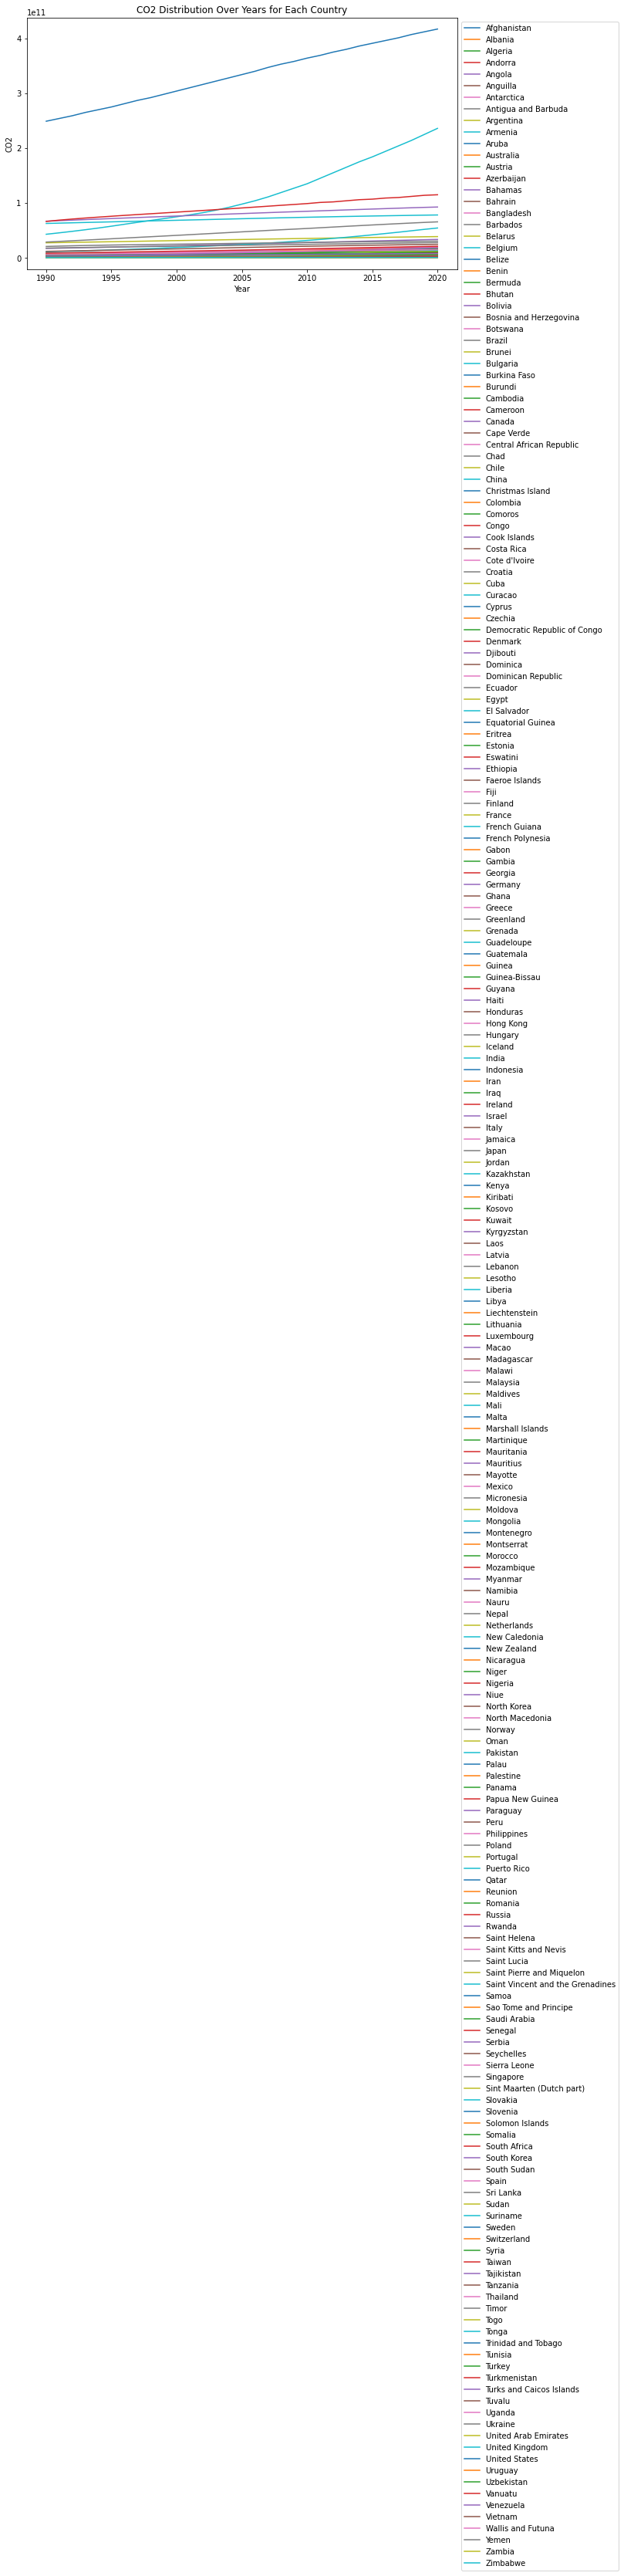

In [8]:
filtered_main = main_df[main_df['Year'] >= 1990]
# filtered_main = main_df[main_df['CO2 emission (Tons)'] >= avg_co2]
non_zero_years = filtered_main[filtered_main.groupby('Year')['CO2 emission (Tons)'].transform('sum') > 0]

# Plot the remaining data
plt.figure(figsize=(10, 6))
for country, data in non_zero_years.groupby('Country'):
    plt.plot(data['Year'], data['CO2 emission (Tons)'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2')
plt.title('CO2 Distribution Over Years for Each Country')

# Place legend outside the plot to avoid clutter
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

**Findings:** The cut-off for the start of the year has been reduced to 1990, and the new CO2 emission distribution is as of follows. The dataframe is further filtered out to reflect this change.

In [9]:
filtered_main.shape

(6820, 9)

In [10]:
filtered_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6820 entries, 240 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              6820 non-null   object 
 1   Code                 6572 non-null   object 
 2   Calling Code         6417 non-null   object 
 3   Year                 6820 non-null   int64  
 4   CO2 emission (Tons)  6820 non-null   int64  
 5   Population(2022)     6076 non-null   float64
 6   Area                 6324 non-null   float64
 7   % of World           6324 non-null   float64
 8   Density(km2)         6076 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 532.8+ KB


**Findings:** Looking into the filtered dataframe, imortant columns such as 'Population (2022)', 'Area', '% of the World', and 'Density(km2)' has missing values. 

In [11]:
missing_pop = filtered_main['Population(2022)'].isnull()
missing_area = filtered_main['Area'].isnull()
missing_perc = filtered_main['% of World'].isnull()
missing_dens = filtered_main['Density(km2)'].isnull()


# filtered_main[missing_pop]
missing_main = filtered_main[missing_pop | missing_area | missing_perc | missing_dens]
missing_main

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
1595,Anguilla,AI,1-264,1990,51296,NaN,91.0,0.0,NaN
1596,Anguilla,AI,1-264,1991,102592,NaN,91.0,0.0,NaN
1597,Anguilla,AI,1-264,1992,157552,NaN,91.0,0.0,NaN
1598,Anguilla,AI,1-264,1993,223504,NaN,91.0,0.0,NaN
1599,Anguilla,AI,1-264,1994,289456,NaN,91.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
58802,Wallis and Futuna,WF,681,2016,403040,NaN,NaN,NaN,NaN
58803,Wallis and Futuna,WF,681,2017,428688,NaN,NaN,NaN,NaN
58804,Wallis and Futuna,WF,681,2018,454336,NaN,NaN,NaN,NaN
58805,Wallis and Futuna,WF,681,2019,480773,NaN,NaN,NaN,NaN


In [12]:
print(f"The percentage of missing values over total values is: {round(missing_main.shape[0]/filtered_main.shape[0] * 100,2)} %")

The percentage of missing values over total values is: 14.09 %


In [13]:
# The countries that contains missing 
missing_main['Country'].unique()

array(['Anguilla', 'Antarctica', 'Aruba', 'Bermuda', 'Brunei',
       'Cape Verde', 'Christmas Island', 'Congo', 'Cook Islands',
       "Cote d'Ivoire", 'Curacao', 'Czechia',
       'Democratic Republic of Congo', 'Faeroe Islands',
       'French Polynesia', 'Guinea-Bissau', 'Hong Kong', 'Kosovo',
       'Macao', 'Montserrat', 'New Caledonia', 'Niue', 'North Macedonia',
       'Palestine', 'Reunion', 'Saint Helena',
       'Saint Pierre and Miquelon', 'Sint Maarten (Dutch part)', 'Timor',
       'Turks and Caicos Islands', 'Wallis and Futuna'], dtype=object)

In [14]:
# Check on specific country
# missing_main[missing_main['Country'] == 'Antarctica']

**Findings:** Filtering out the rows of countries that has missing values for the important column(s), which appear to be 961 of rows of data (14.09% of the total data). The following rows will be excluded from analysis due to a lack of information

In [15]:
zero_emission = filtered_main[filtered_main['CO2 emission (Tons)'] == 0]
zero_emission['Country'].unique()

array(['Kosovo', 'Marshall Islands', 'Micronesia', 'Namibia', 'Timor',
       'Wallis and Futuna'], dtype=object)

In [16]:
zero_emission.shape

(46, 9)

**Findings:** Additionally, these are the list of countries that has CO2 emissions of 0, which could either reflect a total zero CO2 emission, or an indication of a possible imputation for missing values, which must be dealt with

In [17]:
missing_pop = filtered_main['Population(2022)'].isna()
missing_area = filtered_main['Area'].isna()
missing_perc = filtered_main['% of World'].isna()
missing_dens = filtered_main['Density(km2)'].isna()
non_zero_emission = filtered_main['CO2 emission (Tons)'] > 0

# Drop rows with missing values
filtered_main = filtered_main[(~missing_pop) & (~missing_area) & (~missing_perc) & (~missing_dens) & non_zero_emission]
filtered_main

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
240,Afghanistan,AF,93,1990,59182404,41128771.0,652230.0,0.004,63/km²
241,Afghanistan,AF,93,1991,61609770,41128771.0,652230.0,0.004,63/km²
242,Afghanistan,AF,93,1992,62989232,41128771.0,652230.0,0.004,63/km²
243,Afghanistan,AF,93,1993,64322287,41128771.0,652230.0,0.004,63/km²
244,Afghanistan,AF,93,1994,65603889,41128771.0,652230.0,0.004,63/km²
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042,16320537.0,390757.0,0.003,42/km²
59616,Zimbabwe,ZW,263,2017,746048675,16320537.0,390757.0,0.003,42/km²
59617,Zimbabwe,ZW,263,2018,757903042,16320537.0,390757.0,0.003,42/km²
59618,Zimbabwe,ZW,263,2019,768852126,16320537.0,390757.0,0.003,42/km²


**Findings:** After dropping the rows with missing values or 0 CO2 Emission values, the main dataset has been further reduced to as such. The range of years of analysis has been reduced to 1990-2020 to focus on a more meaningful portion of the dataset

## Filtered main dataset info
After the main dataset has been furthered filtered, here are some basic infomrmation e.g., highest/ lowest CO2 emitters

In [18]:
highest_all_time = filtered_main['CO2 emission (Tons)'].max()
avg_all_time = filtered_main['CO2 emission (Tons)'].mean()
lowest_all_time = filtered_main['CO2 emission (Tons)'].min()

print('All Time Highest CO2 Emission: ', highest_all_time)
print('All Time Average CO2 Emission: ', avg_all_time)
print('All Time Lowest CO2 Emission: ', lowest_all_time)

All Time Highest CO2 Emission:  417000000000
All Time Average CO2 Emission:  6196626954.627434
All Time Lowest CO2 Emission:  10992


In [19]:
filtered_main[filtered_main['CO2 emission (Tons)'] >= highest_all_time]

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
57180,United States,US,1,2020,417000000000,338289857.0,9372610.0,0.061,36/km²


In [20]:
filtered_main[filtered_main['CO2 emission (Tons)'] == lowest_all_time]

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
55795,Tuvalu,TV,688,1990,10992,11312.0,26.0,0.0,435/km²


In [21]:
filtered_main[filtered_main['CO2 emission (Tons)'] >= avg_all_time]

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
2426,Argentina,AR,54,2008,6227920411,45510318.0,2780400.0,0.018,16/km²
2427,Argentina,AR,54,2009,6406869611,45510318.0,2780400.0,0.018,16/km²
2428,Argentina,AR,54,2010,6593602747,45510318.0,2780400.0,0.018,16/km²
2429,Argentina,AR,54,2011,6783876521,45510318.0,2780400.0,0.018,16/km²
2430,Argentina,AR,54,2012,6975591369,45510318.0,2780400.0,0.018,16/km²
...,...,...,...,...,...,...,...,...,...
58260,Venezuela,VE,58,2016,7389194966,28301696.0,916445.0,0.006,31/km²
58261,Venezuela,VE,58,2017,7550730474,28301696.0,916445.0,0.006,31/km²
58262,Venezuela,VE,58,2018,7670907159,28301696.0,916445.0,0.006,31/km²
58263,Venezuela,VE,58,2019,7770082482,28301696.0,916445.0,0.006,31/km²


In [22]:
#Number of Filtered Countries in Main
filtered_countries = filtered_main['Country'].unique().tolist()
print(filtered_countries)
print()
print('# of Countries: ', len(filtered_countries))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiri

**Findings:** After filtering, the countries has been reduced from 220 to 189.

In [23]:
filtered_main.shape

(5854, 9)

In [24]:
filtered_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5854 entries, 240 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              5854 non-null   object 
 1   Code                 5669 non-null   object 
 2   Calling Code         5730 non-null   object 
 3   Year                 5854 non-null   int64  
 4   CO2 emission (Tons)  5854 non-null   int64  
 5   Population(2022)     5854 non-null   float64
 6   Area                 5854 non-null   float64
 7   % of World           5854 non-null   float64
 8   Density(km2)         5854 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 457.3+ KB


## Obtaining Population of Countries for Previous Years

Due to the main dataset containing only population information for the year 2022, an additional dataset is used to obtain information regarding a country's population from **1990 to 2020**

In [25]:
# Population Dataset Information
print('Shape: ', pop_df.shape)
print()
print('Info: ', pop_df.info())

Shape:  (2072520, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072520 entries, 0 to 2072519
Data columns (total 20 columns):
 #   Column       Dtype  
---  ------       -----  
 0   SortOrder    int64  
 1   LocID        int64  
 2   Notes        object 
 3   ISO3_code    object 
 4   ISO2_code    object 
 5   SDMX_code    float64
 6   LocTypeID    int64  
 7   LocTypeName  object 
 8   ParentID     int64  
 9   Location     object 
 10  VarID        int64  
 11  Variant      object 
 12  Time         int64  
 13  MidPeriod    int64  
 14  AgeGrp       object 
 15  AgeGrpStart  int64  
 16  AgeGrpSpan   int64  
 17  PopMale      float64
 18  PopFemale    float64
 19  PopTotal     float64
dtypes: float64(4), int64(9), object(7)
memory usage: 316.2+ MB
Info:  None


In [26]:
pop_df.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,0,0,1,41312.322,39439.289,80751.611
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,1,1,1,35761.048,34274.347,70035.395
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,2,2,1,33514.723,32065.083,65579.806
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,3,3,1,31076.464,29780.727,60857.191
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950,4,4,1,28786.661,27647.057,56433.718


### What is the countries that does not exist in the Population Dataset 

Find out the number of countries that does not that exist in the Population dataset despite existing in the main dataset.

In [27]:
# What is the countries that does not exist in Population Dataset

pop_countries = pop_df['Location'].unique().tolist()
pop_additional_countries = []
pop_existing_countries = []
pop_missing_countries = []

for country in pop_countries:
    
    if country not in filtered_countries:
        pop_additional_countries.append(country)
    else:
        pop_existing_countries.append(country)

for country in filtered_countries:
    if country not in pop_countries:
        pop_missing_countries.append(country)

# Number of countries existing in both Population and Filtered Main
print('Number of existing countries: ', len(pop_existing_countries))
print('Number of additional countries: ', len(pop_additional_countries))
print('Number of missing countries: ', len(pop_missing_countries))


Number of existing countries:  175
Number of additional countries:  108
Number of missing countries:  14


In [28]:
# Countries in the Population Dataset that does not exist in Main Dataset
pop_additional_countries

['World',
 'Sub-Saharan Africa',
 'Northern Africa and Western Asia',
 'Central and Southern Asia',
 'Eastern and South-Eastern Asia',
 'Latin America and the Caribbean',
 'Oceania (excluding Australia and New Zealand)',
 'Australia/New Zealand',
 'Europe and Northern America',
 'More developed regions',
 'Less developed regions',
 'Least developed countries',
 'Less developed regions, excluding least developed countries',
 'Less developed regions, excluding China',
 'Land-locked Developing Countries (LLDC)',
 'Small Island Developing States (SIDS)',
 'High-income countries',
 'Middle-income countries',
 'Upper-middle-income countries',
 'Lower-middle-income countries',
 'Low-income countries',
 'No income group available',
 'Africa',
 'Eastern Africa',
 'Réunion',
 'United Republic of Tanzania',
 'Middle Africa',
 'Congo',
 'Democratic Republic of the Congo',
 'Northern Africa',
 'Western Sahara',
 'Southern Africa',
 'Western Africa',
 'Cabo Verde',
 "Côte d'Ivoire",
 'Guinea-Bissau'

In [29]:
# Countries not in the Population Dataset but is in Main Dataset
pop_missing_countries

['Bolivia',
 'Iran',
 'Laos',
 'Moldova',
 'North Korea',
 'Russia',
 'South Korea',
 'Syria',
 'Taiwan',
 'Tanzania',
 'Turkey',
 'United States',
 'Venezuela',
 'Vietnam']

**Findings:** The missing countries in the population dataset suggest a possibility in naming convention differences. Hence, find if there is any possible matches in the 'missing countries' in the additional countries (countries that did not exist in the main dataset) that the population dataset has. 

In [30]:
# Test out names to see if there is countries information, just spelled differently
# Change the country variable accordingly

country_to_check = 'Bolivia'
for country in pop_additional_countries:
    if country_to_check in country:
        print(country)

# pop_additional_countries

Bolivia (Plurinational State of)


In [31]:
# Store the name of countries in Population Dataset that exist in main dataset but was named differently
rename_countries = ["Bolivia (Plurinational State of)",
                    "Iran (Islamic Republic of)",
                    "Lao People's Democratic Republic",
                   "Republic of Moldova",
                   "Dem. People's Republic of Korea",
                   "Russian Federation",
                   "Republic of Korea",
                   "Syrian Arab Republic",
                   "China, Taiwan Province of China",
                   "United Republic of Tanzania",
                    "Türkiye",
                   "United States of America",
                   "Venezuela (Bolivarian Republic of)",
                   "Viet Nam"]

In [32]:
# Filtered out only necessary columns
filtered_pop = pop_df[['Location','Time','PopTotal']]

In [33]:
#Rename columns to standardize with main dataset and for clarity
filtered_pop = filtered_pop.copy()
filtered_pop.rename(columns={'Location': 'Country', 'Time': 'Year', 'PopTotal':'Total Population (Thousands)'}, inplace=True)
filtered_pop.head()

,Country,Year,Total Population (Thousands)
0,World,1950,80751.611
1,World,1950,70035.395
2,World,1950,65579.806
3,World,1950,60857.191
4,World,1950,56433.718


In [34]:
# Combine the mutual countries of population and main dataset together and the countries that requires renaming
keep_countries = pop_existing_countries + rename_countries
print('The number of countries exist in both Population and Main Dataset is: ', len(keep_countries))

The number of countries exist in both Population and Main Dataset is:  189


**Findings:** We can see that the Population dataset has all the countries of Main Dataset (189 Countries), with 14 countries that requires renaming to match the one in the Main Dataset

In [35]:
# Filtered out the 189 Countries only (Countries in Population Dataset and Main Dataset)
filtered_pop = filtered_pop[filtered_pop['Country'].isin(keep_countries)]

In [36]:
filtered_pop.head()

,Country,Year,Total Population (Thousands)
174528,Burundi,1950,82.962
174529,Burundi,1950,78.222
174530,Burundi,1950,71.985
174531,Burundi,1950,68.420
174532,Burundi,1950,65.273


In [37]:
# Create a list of dictionary of the countries to be renamed, and what it should be renamed to in a dict
rename_list = [{key: value} for key, value in zip(rename_countries, pop_missing_countries)]
rename_dict = {list(d.keys())[0]: list(d.values())[0] for d in rename_list}

In [38]:
rename_dict

{'Bolivia (Plurinational State of)': 'Bolivia',
 'Iran (Islamic Republic of)': 'Iran',
 "Lao People's Democratic Republic": 'Laos',
 'Republic of Moldova': 'Moldova',
 "Dem. People's Republic of Korea": 'North Korea',
 'Russian Federation': 'Russia',
 'Republic of Korea': 'South Korea',
 'Syrian Arab Republic': 'Syria',
 'China, Taiwan Province of China': 'Taiwan',
 'United Republic of Tanzania': 'Tanzania',
 'Türkiye': 'Turkey',
 'United States of America': 'United States',
 'Venezuela (Bolivarian Republic of)': 'Venezuela',
 'Viet Nam': 'Vietnam'}

In [39]:
def rename_countries(country):
    
    if country in rename_dict:
        return rename_dict[country]
    
    return country

filtered_pop['Country'] = filtered_pop['Country'].apply(rename_countries)

In [40]:
# What is the countries that does not exist in Population Dataset

pop_countries = filtered_pop['Country'].unique().tolist()
pop_additional_countries = []
pop_existing_countries = []
pop_missing_countries = []

for country in pop_countries:
    
    if country not in filtered_countries:
        pop_additional_countries.append(country)
    else:
        pop_existing_countries.append(country)

for country in filtered_countries:
    if country not in pop_countries:
        pop_missing_countries.append(country)

# Number of countries existing in both Population and Filtered Main
print('Number of existing countries: ', len(pop_existing_countries))
print('Number of additional countries: ', len(pop_additional_countries))
print('Number of missing countries: ', len(pop_missing_countries))

Number of existing countries:  189
Number of additional countries:  0
Number of missing countries:  0


**Findings:** After renaming and filtering out the countries in the Population Dataset, it has all 189 countries in the main dataset

In [41]:
# Look into the info of the current pop dataset (e.g., missing values etc)

In [42]:
#Include only years from 1990 - 2020
filtered_pop = filtered_pop[(filtered_pop['Year'] >= 1990) & (filtered_pop['Year'] <=2020)]
filtered_pop

,Country,Year,Total Population (Thousands)
178568,Burundi,1990,235.136
178569,Burundi,1990,220.424
178570,Burundi,1990,211.087
178571,Burundi,1990,203.463
178572,Burundi,1990,197.557
...,...,...,...
2065142,Tuvalu,2020,0.000
2065143,Tuvalu,2020,0.000
2065144,Tuvalu,2020,0.000
2065145,Tuvalu,2020,0.000


In [43]:
filtered_pop.shape

(591759, 3)

In [44]:
filtered_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591759 entries, 178568 to 2065146
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Country                       591759 non-null  object 
 1   Year                          591759 non-null  int64  
 2   Total Population (Thousands)  591759 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 18.1+ MB


In [45]:
zero_pop = filtered_pop[filtered_pop['Total Population (Thousands)'] <= 0]
zero_pop

,Country,Year,Total Population (Thousands)
178667,Burundi,1990,0.0
178668,Burundi,1990,0.0
178767,Burundi,1991,0.0
178769,Burundi,1991,0.0
178868,Burundi,1992,0.0
...,...,...,...
2065142,Tuvalu,2020,0.0
2065143,Tuvalu,2020,0.0
2065144,Tuvalu,2020,0.0
2065145,Tuvalu,2020,0.0


In [46]:
zero_pop['Country'].unique()

array(['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Mayotte', 'Rwanda',
       'Seychelles', 'South Sudan', 'Uganda', 'Central African Republic',
       'Chad', 'Equatorial Guinea', 'Sao Tome and Principe', 'Sudan',
       'Eswatini', 'Burkina Faso', 'Ghana', 'Guinea', 'Liberia', 'Mali',
       'Mauritania', 'Niger', 'Senegal', 'Togo', 'Afghanistan', 'Bhutan',
       'Maldives', 'Nepal', 'Pakistan', 'Laos', 'Bahrain', 'Qatar',
       'Yemen', 'Andorra', 'Liechtenstein', 'Haiti',
       'Saint Kitts and Nevis', 'Saint Lucia', 'Belize', 'Chile',
       'French Guiana', 'Greenland', 'Solomon Islands', 'Vanuatu',
       'Micronesia', 'Kiribati', 'Marshall Islands', 'Nauru', 'Palau',
       'Samoa', 'Tonga', 'Tuvalu'], dtype=object)

In [47]:
zero_pop['Year'].unique()

array([1990, 1991, 1992, 1994, 1997, 1998, 2000, 2001, 2003, 2016, 2017,
       2018, 1993, 1995, 1996, 1999, 2002, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2019, 2020], dtype=int64)

**Findings:** Out of the 591759 rows in the filtered Population dataset, there are 0 null values, but there 2290 values with 0 Population values, which may suggest placeholder values

### Populate Population Dataset into Dataframe

The Population dataset will then be prepared to a dataframe, to be exported to a sheet in the output excel file.

In [48]:
# Preparing values for Population Dataset dataframe population
pop_years = filtered_pop['Year'].unique().tolist()
# pop_years

In [49]:
# Populate final population dataset with the 'Country' and 'Year' values in the main dataset
final_pop_dict = {'Country': [], 'Year': [], 'Total Population (Thousands)': [] }
final_pop_df = pd.DataFrame(final_pop_dict)

final_pop_df[['Country','Year']] = filtered_main[['Country','Year']]

In [50]:
# Populate Population DF

def populate_pop(row):

    if row['Year'] in pop_years:
        filtered_rows = filtered_pop[(filtered_pop['Country'] == row['Country']) & (filtered_pop['Year'] == row['Year'])]
        if not filtered_rows.empty:
            result = filtered_rows['Total Population (Thousands)'].iloc[0]
        else:
            result = None  # Or any default value
        return result
    else:
        return ''

final_pop_df['Total Population (Thousands)'] = final_pop_df.apply(populate_pop, axis=1)

final_pop_df

,Country,Year,Total Population (Thousands)
240,Afghanistan,1990,498.954
241,Afghanistan,1991,489.043
242,Afghanistan,1992,512.103
243,Afghanistan,1993,619.375
244,Afghanistan,1994,702.421
...,...,...,...
59615,Zimbabwe,2016,464.991
59616,Zimbabwe,2017,464.268
59617,Zimbabwe,2018,464.774
59618,Zimbabwe,2019,468.273


## Selecting the best GDP Dataset

Out of all the four GDP datasets, find out the best GDP dataset to be used to obtain the required information

The approach of selecting the best GDP dataset can be summarised as follows:

- Find the missing countries in GDP (Countries that exist in the main dataset that are not in the GDP Dataset)

- Find the range of years of GDP information available for each GDP dataset

- Find the number of missing GDP information for each GDP dataset

- Populate GDP dataframe with the GDP dataset that has the best combination of the least missing values


In [51]:
# GDP Datasets

In [52]:
# GDP1 Information
print('Shape: ', gdp_df1.shape)
print()
print('Info: ', gdp_df1.info())

Shape:  (120, 63)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  120 non-null    object 
 1   Country Code  120 non-null    object 
 2   1960          119 non-null    float64
 3   1961          120 non-null    float64
 4   1962          120 non-null    float64
 5   1963          120 non-null    float64
 6   1964          120 non-null    float64
 7   1965          120 non-null    float64
 8   1966          120 non-null    float64
 9   1967          120 non-null    float64
 10  1968          120 non-null    float64
 11  1969          120 non-null    float64
 12  1970          120 non-null    float64
 13  1971          120 non-null    float64
 14  1972          120 non-null    float64
 15  1973          120 non-null    float64
 16  1974          120 non-null    float64
 17  1975          120 non-null    float64
 18  1976       

In [53]:
# GDP2 Information
print('Shape: ', gdp_df2.shape)
print()
print('Info: ', gdp_df2.info())

Shape:  (260, 32)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       260 non-null    object 
 1   Country Code  260 non-null    object 
 2   1990          209 non-null    float64
 3   1991          211 non-null    float64
 4   1992          213 non-null    float64
 5   1993          215 non-null    float64
 6   1994          218 non-null    float64
 7   1995          224 non-null    float64
 8   1996          224 non-null    float64
 9   1997          225 non-null    float64
 10  1998          226 non-null    float64
 11  1999          227 non-null    float64
 12  2000          236 non-null    float64
 13  2001          237 non-null    float64
 14  2002          238 non-null    float64
 15  2003          238 non-null    float64
 16  2004          238 non-null    float64
 17  2005          238 non-null    float64
 18  2006       

In [54]:
# GDP3 Information
print('Shape: ', gdp_df3.shape)
print()
print('Info: ', gdp_df3.info())

Shape:  (230, 45)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GDP, current prices (Billions of U.S. dollars)  197 non-null    object 
 1   1980                                            196 non-null    float64
 2   1981                                            196 non-null    float64
 3   1982                                            196 non-null    float64
 4   1983                                            196 non-null    float64
 5   1984                                            196 non-null    float64
 6   1985                                            196 non-null    float64
 7   1986                                            196 non-null    float64
 8   1987                                            196 non-null    float64
 9   1988                    

In [55]:
# GDP4 Information
print('Shape: ', gdp_df4.shape)
print()
print('Info: ', gdp_df4.info())

Shape:  (16492, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        16492 non-null  object 
 1   Country Code        16492 non-null  object 
 2   year                16492 non-null  int64  
 3   GDP_USD             13118 non-null  float64
 4   GDP_per_capita_USD  13115 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 644.3+ KB
Info:  None


### What is the countries that does not exist in each GDP Dataset 

Find out the number of countries that does not that exist in the GDP dataset despite existing in the main dataset.

In [56]:
# GDP1- What is the countries that does not exist in each GDP Dataset

gdp1_countries = gdp_df1['Country Name'].unique().tolist()
gdp1_additional_countries = []
gdp1_existing_countries = []
gdp1_missing_countries = []

for country in gdp1_countries:
    if country not in filtered_countries:
        gdp1_additional_countries.append(country)
    else:
        gdp1_existing_countries.append(country)

for country in filtered_countries:
    if country not in gdp1_countries:
        gdp1_missing_countries.append(country)

# Number of countries existing in both GDP 1 and Filtered Main
print('Number of existing countries: ', len(gdp1_existing_countries))
print('Number of additional countries: ', len(gdp1_additional_countries))
print('Number of missing countries: ', len(gdp1_missing_countries))

Number of existing countries:  80
Number of additional countries:  40
Number of missing countries:  109


In [57]:
# GDP2- What is the countries that does not exist in each GDP Dataset

gdp2_countries = gdp_df2['Country '].unique().tolist()
gdp2_additional_countries = []
gdp2_existing_countries = []
gdp2_missing_countries = []

for country in gdp2_countries:
    if country not in filtered_countries:
        gdp2_additional_countries.append(country)
    else:
        gdp2_existing_countries.append(country)

for country in filtered_countries:
    if country not in gdp2_countries:
        gdp2_missing_countries.append(country)

# Number of countries existing in both GDP 2 and Filtered Main
print('Number of existing countries: ', len(gdp2_existing_countries))
print('Number of additional countries: ', len(gdp2_additional_countries))
print('Number of missing countries: ', len(gdp2_missing_countries))

Number of existing countries:  165
Number of additional countries:  95
Number of missing countries:  24


In [58]:
# GDP3- What is the countries that does not exist in each GDP Dataset

gdp3_countries = gdp_df3['GDP, current prices (Billions of U.S. dollars)'].unique().tolist()
gdp3_additional_countries = []
gdp3_existing_countries = []
gdp3_missing_countries = []

for country in gdp3_countries:
    if country not in filtered_countries:
        gdp3_additional_countries.append(country)
    else:
        gdp3_existing_countries.append(country)

for country in filtered_countries:
    if country not in gdp3_countries:
        gdp3_missing_countries.append(country)

# Number of countries existing in both GDP 3 and Filtered Main
print('Number of existing countries: ', len(gdp3_existing_countries))
print('Number of additional countries: ', len(gdp3_additional_countries))
print('Number of missing countries: ', len(gdp3_missing_countries))

Number of existing countries:  168
Number of additional countries:  30
Number of missing countries:  21


In [59]:
# GDP4- What is the countries that does not exist in each GDP Dataset

gdp4_countries = gdp_df4['Country Name'].unique().tolist()
gdp4_additional_countries = []
gdp4_existing_countries = []
gdp4_missing_countries = []

for country in gdp4_countries:
    if country not in filtered_countries:
        gdp4_additional_countries.append(country)
    else:
        gdp4_existing_countries.append(country)

for country in filtered_countries:
    if country not in gdp4_countries:
        gdp4_missing_countries.append(country)

# Number of countries existing in both GDP 4 and Filtered Main
print('Number of existing countries: ', len(gdp4_existing_countries))
print('Number of additional countries: ', len(gdp4_additional_countries))
print('Number of missing countries: ', len(gdp4_missing_countries))

Number of existing countries:  166
Number of additional countries:  100
Number of missing countries:  23


### The range of years that each GDP dataset has information for 

Find out which dataset is able to match the range of years in the main dataset

In [60]:
# GDP1 - The range of years that each dataset has information for
gdp1_years = gdp_df1.columns[2:].tolist()
# print(len(gdp1_years))
# gdp1_years

In [61]:
# GDP2 - The range of years that each dataset has information for
gdp2_years = gdp_df2.columns[2:].tolist()
# print(len(gdp2_years))
# gdp2_years

In [62]:
# GDP3 - The range of years that each dataset has information for
gdp3_years = gdp_df3.columns[1:].tolist()
# print(len(gdp3_years))
# gdp3_years

In [63]:
# GDP4 - The range of years that each dataset has information for
gdp4_years = gdp_df4['year'].unique().tolist()
# print(len(gdp4_years))
# gdp4_years

### The number of missing values of GDP for each dataset 

Find out which dataset is able to have the least amount of missing GDP information.

In [64]:
# GDP1 - The number of missing values of GDP for each dataset 
# Years with missing dataset 
missing_years1 = []

for year in gdp1_years: 
    temp_dict = {}
    
    if gdp_df1[year].isnull().sum() > 0:
        temp_dict[year] = gdp_df1[year].isnull().sum()
        missing_years1.append(temp_dict)

# missing_years1

In [65]:
# GDP2 - The number of missing values of GDP for each dataset 
# Years with missing dataset 
missing_years2 = []

for year in gdp2_years: 
    temp_dict = {}
    
    if gdp_df2[year].isnull().sum() > 0:
        temp_dict[year] = gdp_df2[year].isnull().sum()
        missing_years2.append(temp_dict)

# missing_years2

In [66]:
# GDP3 - The number of missing values of GDP for each dataset 
# Years with missing dataset 
missing_years3 = []

for year in gdp3_years: 
    temp_dict = {}
    
    if gdp_df3[year].isnull().sum() > 0:
        temp_dict[year] = gdp_df3[year].isnull().sum()
        missing_years3.append(temp_dict)

# missing_years3

In [67]:
# GDP4 - The number of missing values of GDP for each dataset 
# Years with missing dataset 
missing_years4 = []

for year in gdp4_years: 
    temp_dict = {}
    
    if gdp_df4[gdp_df4['year'] == int(year)]['GDP_USD'].isnull().sum() > 0:
        temp_dict[year] = gdp_df4[gdp_df4['year'] == int(year)]['GDP_USD'].isnull().sum()
        missing_years4.append(temp_dict)

# missing_years4

## Obtain World Population Information for Previous Years

Populating main dataset with population information of previous years as only the population for the year 2022 is captured in the main dataset.

## Cross GDP Dataset Analysis

Making the decision of the selection of the best GDP Dataset

In [68]:
# Finding the optimal suitable dataset

# What is the countries that does not exist in each GDP Dataset
print('Number of missing countries of GDP1: ', len(gdp1_missing_countries))
print('Number of missing countries of GDP2: ', len(gdp2_missing_countries))
print('Number of missing countries of GDP3: ', len(gdp3_missing_countries))
print('Number of missing countries of GDP4: ', len(gdp4_missing_countries))

print()
# The range of years that each dataset has information for
print('The range of years in GDP1: ',len(gdp1_years))
print('The range of years in GDP2: ',len(gdp2_years))
print('The range of years in GDP3: ',len(gdp3_years))
print('The range of years in GDP4: ',len(gdp4_years))

# The number of missing values of GDP for each dataset 

print()
print('The number of missing GDP info in GDP 1',len(missing_years1))
print('The number of missing GDP info in GDP 2',len(missing_years2))
print('The number of missing GDP info in GDP 3',len(missing_years3))
print('The number of missing GDP info in GDP 4',len(missing_years4))

Number of missing countries of GDP1:  109
Number of missing countries of GDP2:  24
Number of missing countries of GDP3:  21
Number of missing countries of GDP4:  23

The range of years in GDP1:  61
The range of years in GDP2:  30
The range of years in GDP3:  44
The range of years in GDP4:  62

The number of missing GDP info in GDP 1 1
The number of missing GDP info in GDP 2 30
The number of missing GDP info in GDP 3 44
The number of missing GDP info in GDP 4 62


**Findings:** Choose GDP 3 as the selected number of dataset with the least number of missing country and higher range of years coverage despite not being the lowest with missing values

### Populate GDP Dataset into Dataframe

The GDP dataset will then be prepared to a dataframe, to be exported to a sheet in the output excel file.

In [69]:
# Populate GDP DF

final_gdp_dict = {'Country': [], 'Year': [], 'GDP (USD billions)': [] }
final_gdp_df = pd.DataFrame(final_gdp_dict)

final_gdp_df[['Country','Year']] = filtered_main[['Country','Year']]

def populate_gdp(row):

    if str(row['Year']) in gdp3_years:
        filtered_rows = gdp_df3[gdp_df3['GDP, current prices (Billions of U.S. dollars)'] == row['Country']]
        if not filtered_rows.empty:
            result = filtered_rows[str(row['Year'])].iloc[0]
        else:
            result = None  # Or any default value
        return result
    else:
        return ''

final_gdp_df['GDP (USD billions)'] = final_gdp_df.apply(populate_gdp, axis=1)


final_gdp_df

,Country,Year,GDP (USD billions)
240,Afghanistan,1990,0.000
241,Afghanistan,1991,0.000
242,Afghanistan,1992,0.000
243,Afghanistan,1993,0.000
244,Afghanistan,1994,0.000
...,...,...,...
59615,Zimbabwe,2016,20.555
59616,Zimbabwe,2017,21.385
59617,Zimbabwe,2018,36.945
59618,Zimbabwe,2019,22.995


## Selecting the best Energy Consumption (EC) Dataset

Out of all the four EC datasets, find out the best EC dataset to be used to obtain the required information

The approach of selecting the best EC dataset can be summarised as follows:

- Find the missing countries in EC (Countries that exist in the main dataset that are not in the EC Dataset)

- Find the range of years of EC information available for each EC dataset

- Find the number of missing EC information for each EC dataset

- Populate EC dataframe with the EC dataset that has the best combination of the least missing values


In [70]:
#Energy Consumption

In [71]:
ec_df1.head()

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.309,0.630,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.329,0.565,0.0,0.0,0.0,0.0,0.0


In [72]:
def get_total_consumption(row):
    
    return row['Electricity from coal (TWh)'] + row['Electricity from gas (TWh)'] + row['Electricity from coal (TWh)'] + row['Electricity from hydro (TWh)'] + row['Electricity from coal (TWh)'] + row['Electricity from other renewables (TWh)'] + row['Electricity from solar (TWh)'] + row['Electricity from oil (TWh)'] + row['Electricity from wind (TWh)'] + row['Electricity from nuclear (TWh)']


ec_df1['Total Electricity Consumption (TWh)'] = ec_df1.apply(get_total_consumption, axis=1)

- For the EC1 dataset, populate new column that stores the sum of all the energy consumption

In [73]:
ec_df1.head()

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Total Electricity Consumption (TWh)
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0,0.467
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0,0.592
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0,0.687
3,Afghanistan,AFG,2003,0.0,0.309,0.630,0.0,0.0,0.0,0.0,0.0,0.939
4,Afghanistan,AFG,2004,0.0,0.329,0.565,0.0,0.0,0.0,0.0,0.0,0.894


In [74]:
ec_df2.head()

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,25.395,45.68403547,14.301991,0.095856,17.242,13.693,0.94,0,57.850,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,25.435,49.53198889,15.312995,0.102625,18.535,14.058,1.171,0,57.076,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,25.459,51.67001137,15.727010,0.103192,19.454,15.130,1.056,0,56.904,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,25.463,52.38599054,16.596984,0.105782,20.653,15.144,1.015,0,56.995,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,23.971,48.20601995,16.117004,0.102888,21.177,15.545,0.943,0,56.312,0


In [75]:
ec_df3.head()

,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


In [76]:
ec_df4.head()

,Entity,Year,Per capita electricity (kWh)
0,Afghanistan,2000,22.474
1,Afghanistan,2001,27.399
2,Afghanistan,2002,30.397
3,Afghanistan,2003,39.652
4,Afghanistan,2004,36.155


### What is the countries that does not exist in each EC Dataset 

Find out the number of countries that does not that exist in the EC dataset despite existing in the main dataset.

In [77]:
# EC1- What is the countries that does not exist in each EC Dataset

ec1_countries = ec_df1['Entity'].unique().tolist()
ec1_additional_countries = []
ec1_existing_countries = []
ec1_missing_countries = []

for country in ec1_countries:
    if country not in filtered_countries:
        ec1_additional_countries.append(country)
    else:
        ec1_existing_countries.append(country)

for country in filtered_countries:
    if country not in ec1_countries:
        ec1_missing_countries.append(country)

# Number of countries existing in both EC 1 and Filtered Main
print('Number of existing countries: ', len(ec1_existing_countries))
print('Number of additional countries: ', len(ec1_additional_countries))
print('Number of missing countries: ', len(ec1_missing_countries))


Number of existing countries:  180
Number of additional countries:  55
Number of missing countries:  9


In [78]:
# EC2- What is the countries that does not exist in each EC Dataset

ec2_countries = ec_df2['country'].unique().tolist()
ec2_additional_countries = []
ec2_existing_countries = []
ec2_missing_countries = []

for country in ec2_countries:
    if country not in filtered_countries:
        ec2_additional_countries.append(country)
    else:
        ec2_existing_countries.append(country)

for country in filtered_countries:
    if country not in ec2_countries:
        ec2_missing_countries.append(country)

# Number of countries existing in both EC 2 and Filtered Main
print('Number of existing countries: ', len(ec2_existing_countries))
print('Number of additional countries: ', len(ec2_additional_countries))
print('Number of missing countries: ', len(ec2_missing_countries))


Number of existing countries:  43
Number of additional countries:  1
Number of missing countries:  146


In [79]:
# EC3- What is the countries that does not exist in each EC Dataset

ec3_countries = ec_df3['Entity'].unique().tolist()
ec3_additional_countries = []
ec3_existing_countries = []
ec3_missing_countries = []

for country in ec3_countries:
    if country not in filtered_countries:
        ec3_additional_countries.append(country)
    else:
        ec3_existing_countries.append(country)

for country in filtered_countries:
    if country not in ec3_countries:
        ec3_missing_countries.append(country)

# Number of countries existing in both EC 3 and Filtered Main
print('Number of existing countries: ', len(ec3_existing_countries))
print('Number of additional countries: ', len(ec3_additional_countries))
print('Number of missing countries: ', len(ec3_missing_countries))


Number of existing countries:  180
Number of additional countries:  35
Number of missing countries:  9


In [80]:
# EC4- What is the countries that does not exist in each EC Dataset

ec4_countries = ec_df4['Entity'].unique().tolist()
ec4_additional_countries = []
ec4_existing_countries = []
ec4_missing_countries = []

for country in ec4_countries:
    if country not in filtered_countries:
        ec4_additional_countries.append(country)
    else:
        ec4_existing_countries.append(country)

for country in filtered_countries:
    if country not in ec4_countries:
        ec4_missing_countries.append(country)

# Number of countries existing in both EC 4 and Filtered Main
print('Number of existing countries: ', len(ec4_existing_countries))
print('Number of additional countries: ', len(ec4_additional_countries))
print('Number of missing countries: ', len(ec4_missing_countries))


Number of existing countries:  180
Number of additional countries:  33
Number of missing countries:  9


### The range of years that each EC dataset has information for 

Find out which dataset is able to match the range of years in the main dataset

In [81]:
# EC1 - The range of years that each dataset has information for
ec1_years = ec_df1['Year'].unique().tolist()
# print(len(ec1_years))
# ec1_years 


In [82]:
# EC2 - The range of years that each dataset has information for
ec2_years = ec_df2['Year'].unique().tolist()
# print(len(ec2_years))
# ec2_years 


In [83]:
# EC3 - The range of years that each dataset has information for
ec3_years = ec_df3['Year'].unique().tolist()
# print(len(ec3_years))
# ec3_years 


In [84]:
# EC4 - The range of years that each dataset has information for
ec4_years = ec_df4['Year'].unique().tolist()
# print(len(ec4_years))
# ec4_years 


In [85]:
ec_df1.head()

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Total Electricity Consumption (TWh)
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0,0.467
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0,0.592
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0,0.687
3,Afghanistan,AFG,2003,0.0,0.309,0.630,0.0,0.0,0.0,0.0,0.0,0.939
4,Afghanistan,AFG,2004,0.0,0.329,0.565,0.0,0.0,0.0,0.0,0.0,0.894


### The number of missing values of EC for each dataset 

Find out which dataset is able to have the least amount of missing EC information.

In [86]:
# EC1 - The number of missing values of EC for each dataset 
# Years with missing dataset 
missing_years_ec1 = []

for year in ec1_years: 
    temp_dict = {}
    
    if ec_df1[ec_df1['Year'] == int(year)]['Total Electricity Consumption (TWh)'].isnull().sum() > 0:
        temp_dict[year] = ec_df1[ec_df1['Year'] == int(year)]['Total Electricity Consumption (TWh)'].isnull().sum()
        missing_years_ec1.append(temp_dict)

# missing_years_ec1

In [87]:
ec_df2.head()

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,25.395,45.68403547,14.301991,0.095856,17.242,13.693,0.94,0,57.850,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,25.435,49.53198889,15.312995,0.102625,18.535,14.058,1.171,0,57.076,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,25.459,51.67001137,15.727010,0.103192,19.454,15.130,1.056,0,56.904,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,25.463,52.38599054,16.596984,0.105782,20.653,15.144,1.015,0,56.995,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,23.971,48.20601995,16.117004,0.102888,21.177,15.545,0.943,0,56.312,0


In [88]:
# EC2 - The number of missing values of EC for each dataset 
# Years with missing dataset 
missing_years_ec2 = []

for year in ec2_years: 
    temp_dict = {}
    
    if ec_df2[ec_df2['Year'] == int(year)]['Total energy consumption (Mtoe)'].isnull().sum() > 0:
        temp_dict[year] = ec_df2[ec_df2['Year'] == int(year)]['Total energy consumption (Mtoe)'].isnull().sum()
        missing_years_ec2.append(temp_dict)

# missing_years_ec2


In [89]:
# To dbl cfm if indeed ec_df2 has no missing values
# print(ec_df2.shape)
# print()
# ec_df2.info()

In [90]:
ec_df3.head()

,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


In [91]:
# EC3 - The number of missing values of EC for each dataset 
# Years with missing dataset 
missing_years_ec3 = []

for year in ec3_years: 
    temp_dict = {}
    
    if ec_df3[ec_df3['Year'] == int(year)]['Energy consumption per capita (kWh)'].isnull().sum() > 0:
        temp_dict[year] = ec_df3[ec_df3['Year'] == int(year)]['Energy consumption per capita (kWh)'].isnull().sum()
        missing_years_ec3.append(temp_dict)

missing_years_ec3


[]

In [92]:
# To dbl cfm if indeed ec_df2 has no missing values
# print(ec_df3.shape)
# print()
# ec_df3.info()

In [93]:
ec_df4.head()

,Entity,Year,Per capita electricity (kWh)
0,Afghanistan,2000,22.474
1,Afghanistan,2001,27.399
2,Afghanistan,2002,30.397
3,Afghanistan,2003,39.652
4,Afghanistan,2004,36.155


In [94]:
# EC4 - The number of missing values of EC for each dataset 
# Years with missing dataset 
missing_years_ec4 = []

for year in ec4_years: 
    temp_dict = {}
    
    if ec_df4[ec_df4['Year'] == int(year)]['Per capita electricity (kWh)'].isnull().sum() > 0:
        temp_dict[year] = ec_df4[ec_df4['Year'] == int(year)]['Per capita electricity (kWh)'].isnull().sum()
        missing_years_ec4.append(temp_dict)

# missing_years_ec4

In [95]:
# # To dbl cfm if indeed ec_df2 has no missing values
# print(ec_df4.shape)
# print()
# ec_df4.info()

### The number of EC amounting to 0 for each dataset 

Find out the number of EC amounting to 0 for each dataset

In [96]:
# EC1 - The number of EC info amounting to 0
ec1_zero = ec_df1[ec_df1['Total Electricity Consumption (TWh)'] == 0].shape[0]
ec1_zero

51

In [97]:
# EC2 - The number of EC info amounting to 0
ec2_zero = ec_df2[ec_df2['Total energy consumption (Mtoe)'] == 0].shape[0]
ec2_zero

0

In [98]:
# ec_df3.head()

In [99]:
# EC3 - The number of EC info amounting to 0
ec3_zero = ec_df3[ec_df3['Energy consumption per capita (kWh)'] == 0].shape[0]
ec3_zero

53

In [100]:
# ec_df4.head()

In [101]:
# EC4 - The number of EC info amounting to 0
ec4_zero = ec_df4[ec_df4['Per capita electricity (kWh)'] == 0].shape[0]
ec4_zero

28

## Selecting Best EC Dataset 

In [102]:
# Finding the optimal EC suitable dataset

# What is the countries that does not exist in each EC Dataset
print('Number of missing countries of EC1: ', len(ec1_missing_countries))
print('Number of missing countries of EC2: ', len(ec2_missing_countries))
print('Number of missing countries of EC3: ', len(ec3_missing_countries))
print('Number of missing countries of EC4: ', len(ec4_missing_countries))

print()
# The range of years that each dataset has information for
print('The range of years in EC1: ',len(ec1_years))
print('The range of years in EC2: ',len(ec2_years))
print('The range of years in EC3: ',len(ec3_years))
print('The range of years in EC4: ',len(ec4_years))

# The number of missing values of EC for each dataset 

print()
print('The number of missing EC info in EC 1',len(missing_years_ec1))
print('The number of missing EC info in EC 2',len(missing_years_ec2))
print('The number of missing EC info in EC 3',len(missing_years_ec3))
print('The number of missing EC info in EC 4',len(missing_years_ec4))

# The number of EC information with the value of 0
print()
print('Number of 0 EC in EC1: ',ec1_zero)
print('Number of 0 EC in EC2: ',ec2_zero)
print('Number of 0 EC in EC3: ',ec3_zero)
print('Number of 0 EC in EC4: ',ec4_zero)

Number of missing countries of EC1:  9
Number of missing countries of EC2:  146
Number of missing countries of EC3:  9
Number of missing countries of EC4:  9

The range of years in EC1:  36
The range of years in EC2:  31
The range of years in EC3:  55
The range of years in EC4:  37

The number of missing EC info in EC 1 35
The number of missing EC info in EC 2 0
The number of missing EC info in EC 3 0
The number of missing EC info in EC 4 0

Number of 0 EC in EC1:  51
Number of 0 EC in EC2:  0
Number of 0 EC in EC3:  53
Number of 0 EC in EC4:  28


**Findings:** EC4 will be choose due to the least number of having missing countries, range of years that fit the criteria.

### Populate EC Dataset into Dataframe

The EC dataset will then be prepared to a dataframe, to be exported to a sheet in the output excel file.

In [103]:
# filtered_rows = ec_df4[(ec_df4['Entity'] == 'Afghanistan') & (ec_df4['Year'] == 1990)]
# # result = filtered_rows['2000'].iloc[0]
# filtered_rows

In [104]:
# Populate EC DF

final_ec_dict = {'Country': [], 'Year': [], 'Per capita electricity (kWh)': [] }
final_ec_df = pd.DataFrame(final_ec_dict)

final_ec_df[['Country','Year']] = filtered_main[['Country','Year']]

def populate_ec(row):

    if row['Year'] in ec4_years:
        filtered_rows = ec_df4[(ec_df4['Entity'] == row['Country']) & (ec_df4['Year'] == row['Year'])]
        if not filtered_rows.empty:
            result = filtered_rows['Per capita electricity (kWh)'].iloc[0]
        else:
            result = None  # Or any default value
        return result
    else:
        return ''

final_ec_df['Per capita electricity (kWh)'] = final_ec_df.apply(populate_ec, axis=1)


final_ec_df

,Country,Year,Per capita electricity (kWh)
240,Afghanistan,1990,NaN
241,Afghanistan,1991,NaN
242,Afghanistan,1992,NaN
243,Afghanistan,1993,NaN
244,Afghanistan,1994,NaN
...,...,...,...
59615,Zimbabwe,2016,486.509
59616,Zimbabwe,2017,513.434
59617,Zimbabwe,2018,632.533
59618,Zimbabwe,2019,617.672


## Generate Continent Column of Main Dataset

Assign 'Country-to-Continent' mapping and assign a dataframe to store the mapping of countries to its continents for cross-continent analysis.

In [105]:
country_to_continent_mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Guiana': 'South America',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guadeloupe': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'North America',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mayotte': 'Africa',
    'Mexico': 'North America',
    'Micronesia': 'Oceania',
    'Moldova': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Korea': 'Asia',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Create DataFrame
continent_df = pd.DataFrame(list(country_to_continent_mapping.items()), columns=['Country', 'Continent'])

In [106]:
final_gdp_df.head()

,Country,Year,GDP (USD billions)
240,Afghanistan,1990,0.0
241,Afghanistan,1991,0.0
242,Afghanistan,1992,0.0
243,Afghanistan,1993,0.0
244,Afghanistan,1994,0.0


## Preparing Final Cleaned Dataset

The following datasets has been cleaned and will be exported to different sheets in the same output excel file as the final cleaned dataset

- Main Dataset
- GDP Info Dataset
- EC Info Dataset
- Continents Dataset

In [107]:
filtered_main.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
240,Afghanistan,AF,93,1990,59182404,41128771.0,652230.0,0.004,63/km²
241,Afghanistan,AF,93,1991,61609770,41128771.0,652230.0,0.004,63/km²
242,Afghanistan,AF,93,1992,62989232,41128771.0,652230.0,0.004,63/km²
243,Afghanistan,AF,93,1993,64322287,41128771.0,652230.0,0.004,63/km²
244,Afghanistan,AF,93,1994,65603889,41128771.0,652230.0,0.004,63/km²


In [108]:
final_pop_df.head()

,Country,Year,Total Population (Thousands)
240,Afghanistan,1990,498.954
241,Afghanistan,1991,489.043
242,Afghanistan,1992,512.103
243,Afghanistan,1993,619.375
244,Afghanistan,1994,702.421


In [109]:
final_gdp_df.head()

,Country,Year,GDP (USD billions)
240,Afghanistan,1990,0.0
241,Afghanistan,1991,0.0
242,Afghanistan,1992,0.0
243,Afghanistan,1993,0.0
244,Afghanistan,1994,0.0


In [110]:
final_ec_df.head()

,Country,Year,Per capita electricity (kWh)
240,Afghanistan,1990,NaN
241,Afghanistan,1991,NaN
242,Afghanistan,1992,NaN
243,Afghanistan,1993,NaN
244,Afghanistan,1994,NaN


In [111]:
continent_df.head()

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [112]:
filtered_main.columns

Index(['Country', 'Code', 'Calling Code', 'Year', 'CO2 emission (Tons)',
       'Population(2022)', 'Area', '% of World', 'Density(km2)'],
      dtype='object')

In [113]:
# final_pop_df.columns

In [114]:
# final_gdp_df.columns

In [115]:
final_ec_df.columns

Index(['Country', 'Year', 'Per capita electricity (kWh)'], dtype='object')

In [116]:
merged_df = pd.merge(filtered_main, final_ec_df, on=['Country','Year'])
# merged_df = pd.merge(merged_df, final_gdp_df, on=['Country','Year'])
# merged_df = pd.merge(merged_df, final_ec_df, on=['Country','Year'])

In [117]:
merged_df = merged_df.drop(['Code','Calling Code','Population(2022)'], axis=1)

In [118]:
merged_df.shape

(5854, 7)

In [119]:
merged_df.head()

,Country,Year,CO2 emission (Tons),Area,% of World,Density(km2),Per capita electricity (kWh)
0,Afghanistan,1990,59182404,652230.0,0.004,63/km²,NaN
1,Afghanistan,1991,61609770,652230.0,0.004,63/km²,NaN
2,Afghanistan,1992,62989232,652230.0,0.004,63/km²,NaN
3,Afghanistan,1993,64322287,652230.0,0.004,63/km²,NaN
4,Afghanistan,1994,65603889,652230.0,0.004,63/km²,NaN


## Merge with Additional Cleaned Dataset
- To obtain population
- To obtain import/export ratio
- To obtain GDP information

In [120]:
trade_df.columns

Index(['Country', 'Code', 'Calling Code', 'Year', 'CO2 emission (Tons)',
       'Area (km2)', '% of World', 'Density (/km2)', 'Population', 'GDP',
       'Import % of GDP', 'Export (USD 2024 Valuation)'],
      dtype='object')

In [121]:
trade_df = trade_df[['Country','Year','Population','GDP','Import % of GDP','Export (USD 2024 Valuation)']]

In [122]:
trade_df = trade_df.rename(columns={'Population': 'Population (in Thousands)'})

In [123]:
trade_df.shape

(5854, 6)

In [124]:
trade_df.head()

,Country,Year,Population (in Thousands),GDP,Import % of GDP,Export (USD 2024 Valuation)
0,Afghanistan,1990,10694796,NaN,NaN,NaN
1,Afghanistan,1991,10745167,NaN,NaN,NaN
2,Afghanistan,1992,12057433,NaN,NaN,NaN
3,Afghanistan,1993,14003760,NaN,NaN,NaN
4,Afghanistan,1994,15455555,NaN,NaN,NaN


In [125]:
merged_df = pd.merge(merged_df, trade_df, on=['Country','Year'])

In [126]:
merged_df.shape

(5854, 11)

In [127]:
merged_df.head()

,Country,Year,CO2 emission (Tons),Area,% of World,Density(km2),Per capita electricity (kWh),Population (in Thousands),GDP,Import % of GDP,Export (USD 2024 Valuation)
0,Afghanistan,1990,59182404,652230.0,0.004,63/km²,NaN,10694796,NaN,NaN,NaN
1,Afghanistan,1991,61609770,652230.0,0.004,63/km²,NaN,10745167,NaN,NaN,NaN
2,Afghanistan,1992,62989232,652230.0,0.004,63/km²,NaN,12057433,NaN,NaN,NaN
3,Afghanistan,1993,64322287,652230.0,0.004,63/km²,NaN,14003760,NaN,NaN,NaN
4,Afghanistan,1994,65603889,652230.0,0.004,63/km²,NaN,15455555,NaN,NaN,NaN


In [128]:
merged_df['Per capita electricity (kWh)'] = merged_df['Per capita electricity (kWh)'].replace(0, np.nan)

In [129]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       5854 non-null   object 
 1   Year                          5854 non-null   int64  
 2   CO2 emission (Tons)           5854 non-null   int64  
 3   Area                          5854 non-null   float64
 4   % of World                    5854 non-null   float64
 5   Density(km2)                  5854 non-null   object 
 6   Per capita electricity (kWh)  4441 non-null   float64
 7   Population (in Thousands)     5854 non-null   int64  
 8   GDP                           5656 non-null   float64
 9   Import % of GDP               4900 non-null   float64
 10  Export (USD 2024 Valuation)   4913 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 503.2+ KB


In [130]:
merged_df[merged_df['GDP'].isnull()]

,Country,Year,CO2 emission (Tons),Area,% of World,Density(km2),Per capita electricity (kWh),Population (in Thousands),GDP,Import % of GDP,Export (USD 2024 Valuation)
0,Afghanistan,1990,59182404,652230.0,0.004,63/km²,NaN,10694796,NaN,NaN,NaN
1,Afghanistan,1991,61609770,652230.0,0.004,63/km²,NaN,10745167,NaN,NaN,NaN
2,Afghanistan,1992,62989232,652230.0,0.004,63/km²,NaN,12057433,NaN,NaN,NaN
3,Afghanistan,1993,64322287,652230.0,0.004,63/km²,NaN,14003760,NaN,NaN,NaN
4,Afghanistan,1994,65603889,652230.0,0.004,63/km²,NaN,15455555,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5727,Venezuela,2018,7670907159,916445.0,0.006,31/km²,3346.298,29825653,NaN,NaN,NaN
5728,Venezuela,2019,7770082482,916445.0,0.006,31/km²,3126.684,28971683,NaN,NaN,NaN
5729,Venezuela,2020,7854691960,916445.0,0.006,31/km²,NaN,28490453,NaN,NaN,NaN
5790,Yemen,2019,614885843,527968.0,0.004,64/km²,86.190,31546691,NaN,NaN,NaN


### Generate Columns to track missing values

In [131]:
def gdp_missing(gdp):
    if pd.isnull(gdp):
        return 1
    return 0

def ec_missing(ec):
    if pd.isnull(ec):
        return 1
    return 0

def import_missing(import_info):
    if pd.isnull(import_info):
        return 1
    return 0

def export_missing(export_info):
    if pd.isnull(export_info):
        return 1
    return 0

merged_df['GDP_missing'] = merged_df['GDP'].apply(gdp_missing)
merged_df['EC_missing'] = merged_df['Per capita electricity (kWh)'].apply(ec_missing)
merged_df['Import_missing'] = merged_df['Import % of GDP'].apply(import_missing)
merged_df['Export_missing'] = merged_df['Export (USD 2024 Valuation)'].apply(export_missing)


In [132]:
merged_df.head()

,Country,Year,CO2 emission (Tons),Area,% of World,Density(km2),Per capita electricity (kWh),Population (in Thousands),GDP,Import % of GDP,Export (USD 2024 Valuation),GDP_missing,EC_missing,Import_missing,Export_missing
0,Afghanistan,1990,59182404,652230.0,0.004,63/km²,NaN,10694796,NaN,NaN,NaN,1,1,1,1
1,Afghanistan,1991,61609770,652230.0,0.004,63/km²,NaN,10745167,NaN,NaN,NaN,1,1,1,1
2,Afghanistan,1992,62989232,652230.0,0.004,63/km²,NaN,12057433,NaN,NaN,NaN,1,1,1,1
3,Afghanistan,1993,64322287,652230.0,0.004,63/km²,NaN,14003760,NaN,NaN,NaN,1,1,1,1
4,Afghanistan,1994,65603889,652230.0,0.004,63/km²,NaN,15455555,NaN,NaN,NaN,1,1,1,1


In [133]:
# Number of GDP missing based on GDP_Missing
print('# of Existing GDP: ',merged_df[merged_df['GDP_missing'] == 0].shape[0])
print('# of Missing GDP: ',merged_df[merged_df['GDP_missing'] == 1].shape[0])

print()

#Number of EC missing based on EC_missing
print('# of Existing EC: ',merged_df[merged_df['EC_missing'] == 0].shape[0])
print('# of Missing EC: ',merged_df[merged_df['EC_missing'] == 1].shape[0])

print()

#Number of Import missing based on Import_missing
print('# of Existing Import: ',merged_df[merged_df['Import_missing'] == 0].shape[0])
print('# of Missing Export: ',merged_df[merged_df['Import_missing'] == 1].shape[0])

print()

#Number of Export missing based on Import_missing
print('# of Existing Export: ',merged_df[merged_df['Export_missing'] == 0].shape[0])
print('# of Missing Import: ',merged_df[merged_df['Export_missing'] == 1].shape[0])

print()

# of Existing GDP:  5656
# of Missing GDP:  198

# of Existing EC:  4441
# of Missing EC:  1413

# of Existing Import:  4900
# of Missing Export:  954

# of Existing Export:  4913
# of Missing Import:  941



### Impute Missing Values

In [134]:
merged_df['GDP'] = merged_df['GDP'].fillna(merged_df['GDP'].median())
merged_df['Per capita electricity (kWh)'] = merged_df['Per capita electricity (kWh)'].fillna(merged_df['Per capita electricity (kWh)'].median())
merged_df['Import % of GDP'] = merged_df['Import % of GDP'].fillna(merged_df['Import % of GDP'].median())
merged_df['Export (USD 2024 Valuation)'] = merged_df['Export (USD 2024 Valuation)'].fillna(merged_df['Export (USD 2024 Valuation)'].median())

In [135]:
merged_df = merged_df.rename(columns={'GDP': 'GDP (USD Millions)','Area':'Area (km2)'})

In [136]:
merged_df.shape

(5854, 15)

In [137]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       5854 non-null   object 
 1   Year                          5854 non-null   int64  
 2   CO2 emission (Tons)           5854 non-null   int64  
 3   Area (km2)                    5854 non-null   float64
 4   % of World                    5854 non-null   float64
 5   Density(km2)                  5854 non-null   object 
 6   Per capita electricity (kWh)  5854 non-null   float64
 7   Population (in Thousands)     5854 non-null   int64  
 8   GDP (USD Millions)            5854 non-null   float64
 9   Import % of GDP               5854 non-null   float64
 10  Export (USD 2024 Valuation)   5854 non-null   float64
 11  GDP_missing                   5854 non-null   int64  
 12  EC_missing                    5854 non-null   int64  
 13  Imp

## Export Final Cleaned Dataset

**Key Changes**
- Remove Code, Calling Code
- Added Continent info as a separate sheet
- Renamed columns to 'Population (in Thousands), 'GDP (USD Millions)' to add in clarity
- Added a column to track every column with missing values e.g., 'GDP_missing', 'EC_missing', 'Import_missing','Export_missing'
- Impute missing values with the column's median value

In [138]:
with pd.ExcelWriter('CO2 Emissions (Cleaned) Final.xlsx') as writer:
   
    merged_df.to_excel(writer, sheet_name='CO2 Emissions', index=False)
#     final_pop_df.to_excel(writer, sheet_name='Population', index=False)
#     final_gdp_df.to_excel(writer, sheet_name='GDP', index=False)
#     final_ec_df.to_excel(writer, sheet_name='Energy Consumption', index=False)
    continent_df.to_excel(writer, sheet_name='Continent', index=False)

print('Excel sheet exported!')

Excel sheet exported!
